In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from re import sub
drive_path = 'drive/MyDrive/titanic/'

train = pd.read_csv(drive_path + 'train.csv')
test = pd.read_csv(drive_path + 'test.csv')
sub = pd.read_csv(drive_path + 'submission.csv')
print(train.shape, test.shape, sub.shape)

(891, 12) (418, 11) (418, 2)


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [8]:
sub.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


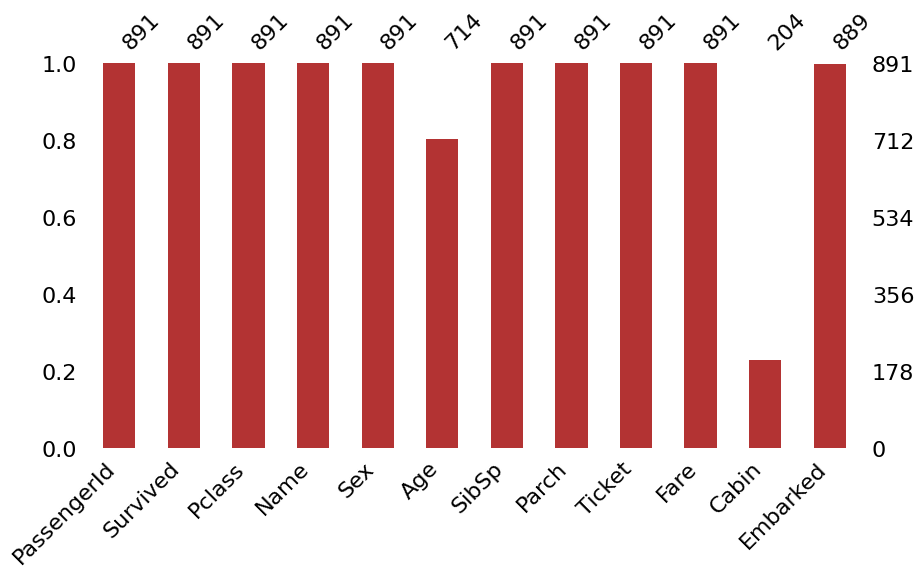

In [11]:
import missingno as msno
msno.bar(train, figsize = (10, 5), color = (0.7, 0.2, 0.2))
plt.show()

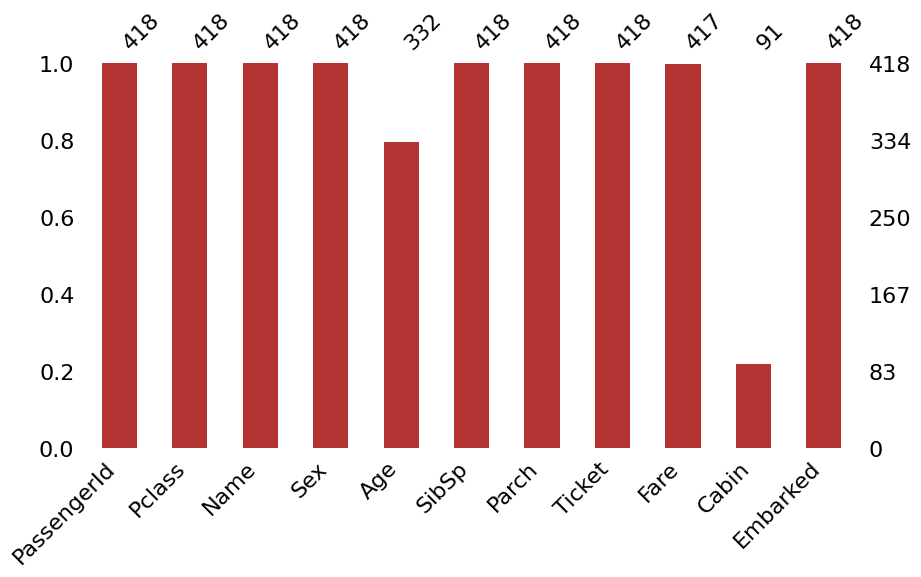

In [12]:
msno.bar(test, figsize = (10, 5), color = (0.7, 0.2, 0.2))
plt.show()

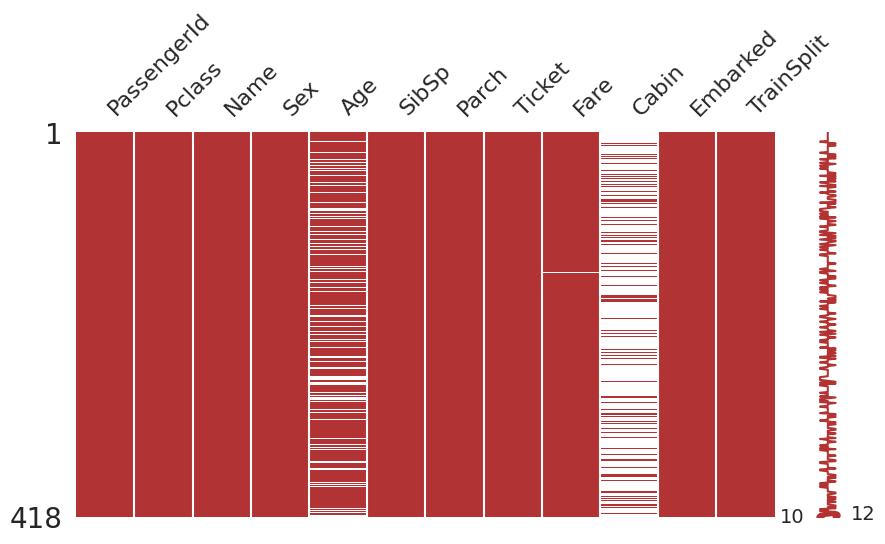

In [25]:
msno.matrix(test, figsize = (10, 5), color = (0.7, 0.2, 0.2))
plt.show()

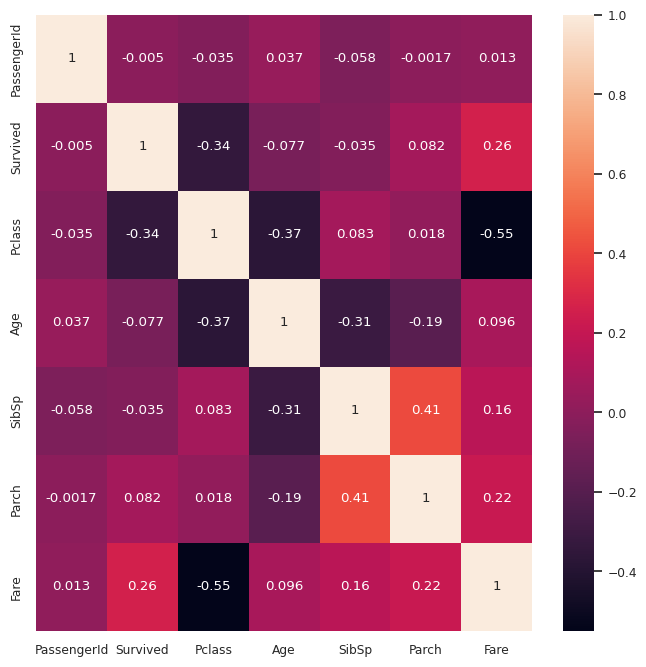

In [21]:
# 숫자형 데이터만 선택
numeric_cols = train.select_dtypes(include=[np.number])

# 히트맵 시각화
plt.figure(figsize=(8, 8))
sns.set(font_scale=0.8)
sns.heatmap(numeric_cols.corr(), annot=True, cbar=True)
plt.show()

#object 열은 무시하고 corr()함수가 작동할줄 알았지만 object 열까지 계산하려다 오류를 발생하는 경우가 생김

In [24]:
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'

data = pd.concat([train, test], axis = 0)

data.shape

(1309, 13)

In [27]:
data_num = data.loc[:, ['Pclass','Age','SibSp','Parch','Fare', 'Survived']]

data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean()) #평균대치법
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])

selected_features = ['Pclass','Age','SibSp','Parch','Fare']

x_train = data_num.loc[data['TrainSplit'] == 'Train', selected_features]
y_train = data_num.loc[data['TrainSplit'] == 'Train', 'Survived']

x_test = data_num.loc[data['TrainSplit'] == 'Test', selected_features]

print('Train 데이터셋 크기 : ', x_train.shape, y_train.shape)
print('Test 데이터셋 크기 : ', x_test.shape)

Train 데이터셋 크기 :  (891, 5) (891,)
Test 데이터셋 크기 :  (418, 5)


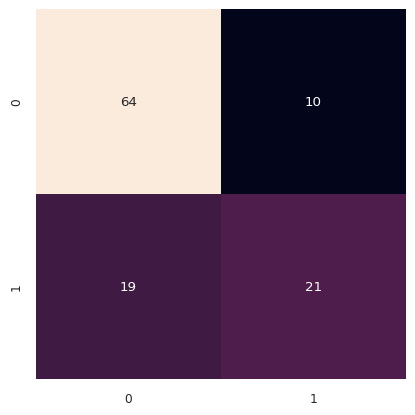

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, shuffle = True ,random_state = 20)

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

y_val_pred = lr_model.predict(x_val)

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_val, y_val_pred), annot = True, cbar = False, square = True)
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

print(f'Accuracy: {accuracy_score(y_val, y_val_pred)}')
print(f'Precision: {precision_score(y_val, y_val_pred)}')
print(f'Recall: {recall_score(y_val, y_val_pred)}')
print(f'F1: {f1_score(y_val, y_val_pred)}')
print(f'AUC: {roc_auc_score(y_val, y_val_pred)}')

Accuracy: 0.7456140350877193
Precision: 0.6774193548387096
Recall: 0.525
F1: 0.5915492957746479
AUC: 0.6949324324324325


In [32]:
y_test_pred = lr_model.predict(x_test)

sub['Survived'] = y_test_pred.astype(int)

sub_filepath = drive_path + 'baseline_num_lr_submission_001.csv'
sub.to_csv(sub_filepath, index = False)
sub.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
